In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
pd.set_option('display.max_columns', 300)


%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('../data/grantnav-20180730153018.csv')

original_df = pd.read_csv('../data/grantnav-20181123024823.csv', low_memory=False)
df = original_df

In [3]:
df.head()


,Identifier,Title,Description,Currency,Amount Applied For,Amount Awarded,Amount Disbursed,Award Date,URL,Planned Dates:Start Date,Planned Dates:End Date,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:End Date,Actual Dates:Duration (months),Recipient Org:Identifier,Recipient Org:Name,Recipient Org:Charity Number,Recipient Org:Company Number,Recipient Org:Postal Code,Recipient Org:Location:0:Geographic Code Type,Recipient Org:Location:0:Geographic Code,Recipient Org:Location:0:Name,Recipient Org:Location:1:Geographic Code Type,Recipient Org:Location:1:Geographic Code,Recipient Org:Location:1:Name,Recipient Org:Location:2:Geographic Code Type,Recipient Org:Location:2:Geographic Code,Recipient Org:Location:2:Name,Funding Org:Identifier,Funding Org:Name,Funding Org:Postal Code,Grant Programme:Code,Grant Programme:Title,Grant Programme:URL,Beneficiary Location:0:Name,Beneficiary Location:0:Country Code,Beneficiary Location:0:Geographic Code,Beneficiary Location:0:Geographic Code Type,Beneficiary Location:1:Name,Beneficiary Location:1:Country Code,Beneficiary Location:1:Geographic Code,Beneficiary Location:1:Geographic Code Type,Beneficiary Location:2:Name,Beneficiary Location:2:Country Code,Beneficiary Location:2:Geographic Code,Beneficiary Location:2:Geographic Code Type,Beneficiary Location:3:Name,Beneficiary Location:3:Country Code,Beneficiary Location:3:Geographic Code,Beneficiary Location:3:Geographic Code Type,Beneficiary Location:4:Name,Beneficiary Location:4:Country Code,Beneficiary Location:4:Geographic Code,Beneficiary Location:4:Geographic Code Type,Beneficiary Location:5:Name,Beneficiary Location:5:Country Code,Beneficiary Location:5:Geographic Code,Beneficiary Location:5:Geographic Code Type,Beneficiary Location:6:Name,Beneficiary Location:6:Country Code,Beneficiary Location:6:Geographic Code,Beneficiary Location:6:Geographic Code Type,Beneficiary Location:7:Name,Beneficiary Location:7:Country Code,Beneficiary Location:7:Geographic Code,Beneficiary Location:7:Geographic Code Type,From An Open Call?,The following fields are not in the 360 Giving Standard and are added by GrantNav.,Data Source,Publisher:Name,Recipient Region,Recipient District,Recipient District Geographic Code,Recipient Ward,Recipient Ward Geographic Code,Retrieved for use in GrantNav,License (see note),"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
0,360G-SE-2010005783LOTT,JUNIOR CLUB DEVELOPMENT PROJECT,Funding under Sport England's Small Grants fun...,GBP,NaN,5800.0,5800.0,2010-09-29T00:00:00+00:00,NaN,2010-09-01T00:00:00+00:00,2011-08-31T00:00:00+00:00,12.0,NaN,NaN,NaN,360G-SE-2010005783,BARKERS' BUTTS RFC,NaN,NaN,CV5 9AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GB-COH-RC000766,Sport England,NaN,SG,Small Grants,http://www.sportengland.org/funding,CV5 9AR,GB,NaN,NaN,Coventry North West,NaN,E14000650,WPC,Coventry,NaN,E08000026,LAD,NaN,NaN,E01009523,LSOA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,https://www.sportengland.org/media/12725/360gi...,Sport England,West Midlands,Coventry District,E08000026,Bablake Ward,E05001218,2018-11-06T08:34:42+00:00,http://www.nationalarchives.gov.uk/doc/open-go...,NaN
1,360G-SE-2010007937LOTT,Urban X BBall League,Funding under Sport England's Small Grants fun...,GBP,NaN,9550.0,9550.0,2010-09-29T00:00:00+00:00,NaN,2010-09-01T00:00:00+00:00,2011-04-01T00:00:00+00:00,7.0,NaN,NaN,NaN,GB-COH-06113662,MBA Association,1119750,06113662,SG1 5RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GB-COH-RC000766,Sport England,NaN,SG,Small Grants,http://www.sportengland.org/funding,SG5 1JB,GB,NaN,NaN,Hitchin and Harpenden,NaN,E14000749,WPC,North Hertfordshire,NaN,E07000099,LAD,NaN,NaN,E01023616,LSOA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df['Description_Orig'] = df['Description'].str.lower()
df['Description'] = df['Description'].str.lower()

In [5]:
df['income'] = False
df['employment'] = False
df['education'] = False
df['health'] = False
df['crime'] = False
df['housing'] = False
df['environment'] = False

In [6]:
len(df.index)

301736

In [7]:
#df.rename(columns={'Identifier': 'id'},inplace=True)

In [8]:
df.columns

Index(['Identifier', 'Title', 'Description', 'Currency', 'Amount Applied For',
       'Amount Awarded', 'Amount Disbursed', 'Award Date', 'URL',
       'Planned Dates:Start Date', 'Planned Dates:End Date',
       'Planned Dates:Duration (months)', 'Actual Dates:Start Date',
       'Actual Dates:End Date', 'Actual Dates:Duration (months)',
       'Recipient Org:Identifier', 'Recipient Org:Name',
       'Recipient Org:Charity Number', 'Recipient Org:Company Number',
       'Recipient Org:Postal Code',
       'Recipient Org:Location:0:Geographic Code Type',
       'Recipient Org:Location:0:Geographic Code',
       'Recipient Org:Location:0:Name',
       'Recipient Org:Location:1:Geographic Code Type',
       'Recipient Org:Location:1:Geographic Code',
       'Recipient Org:Location:1:Name',
       'Recipient Org:Location:2:Geographic Code Type',
       'Recipient Org:Location:2:Geographic Code',
       'Recipient Org:Location:2:Name', 'Funding Org:Identifier',
       'Funding Org:Name', '

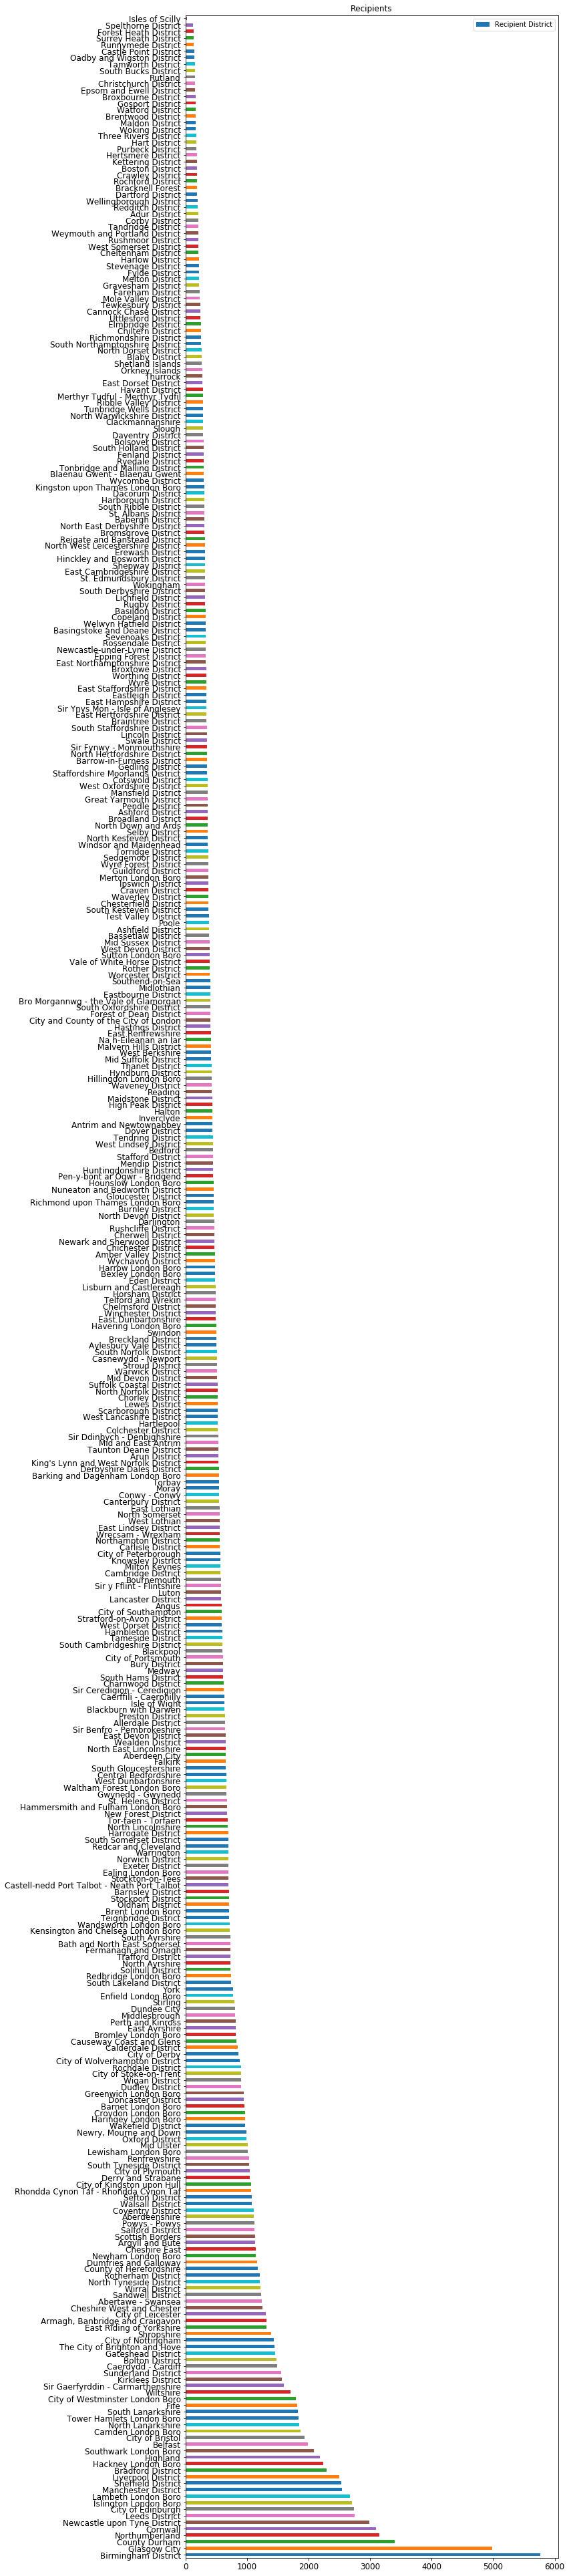

In [9]:
ax = df['Recipient District'].value_counts().plot(kind='barh', \
                                 title ="Recipients", figsize=(10,70),legend=True, fontsize=12)

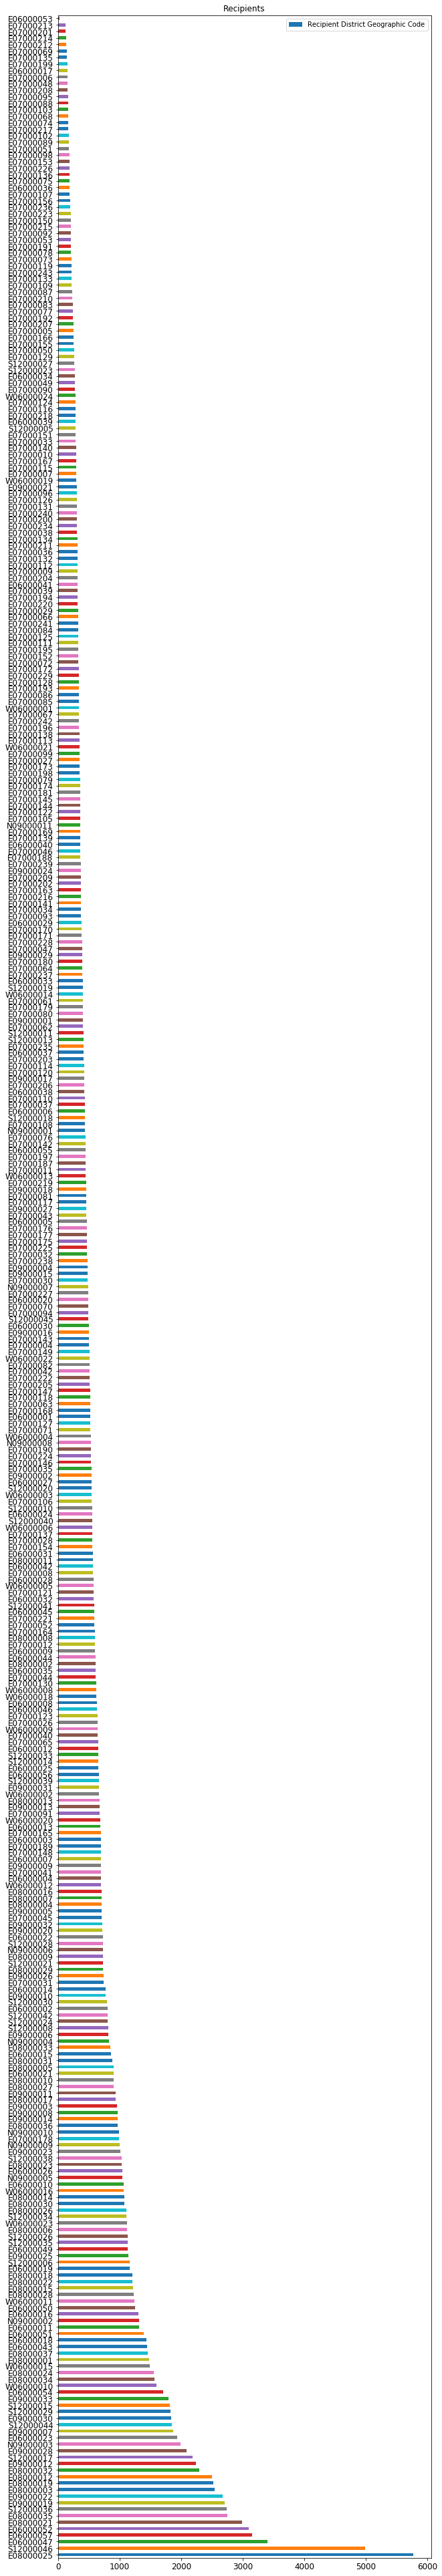

In [10]:
ax = df['Recipient District Geographic Code'].value_counts().plot(kind='barh', \
                                 title ="Recipients", figsize=(10,70),legend=True, fontsize=12)

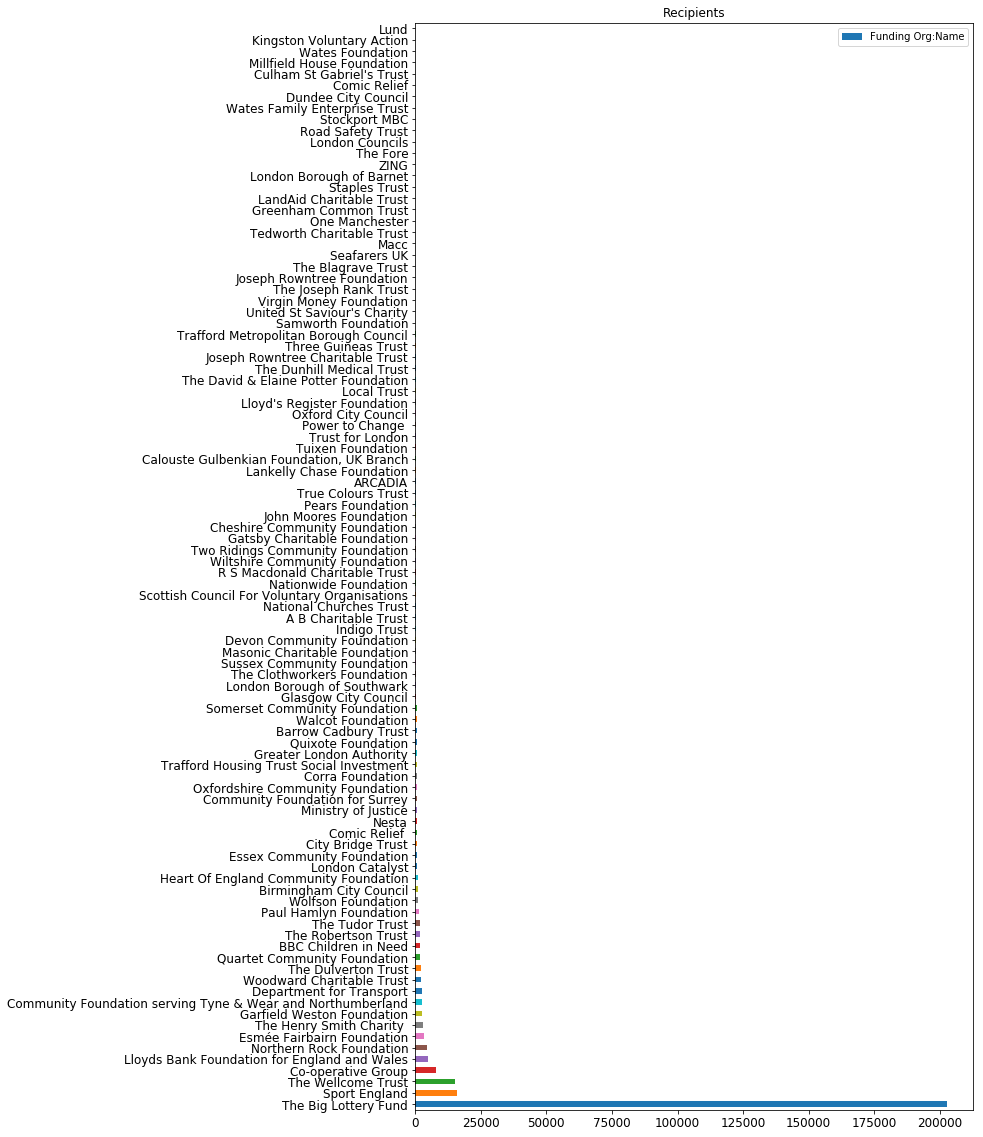

In [11]:
ax = df['Funding Org:Name'].value_counts().plot(kind='barh', \
                                 title ="Recipients", figsize=(10,20),legend=True, fontsize=12)

In [12]:
df['Funding Org:Name'].describe()

count                   301736
unique                      96
top       The Big Lottery Fund
freq                    202573
Name: Funding Org:Name, dtype: object

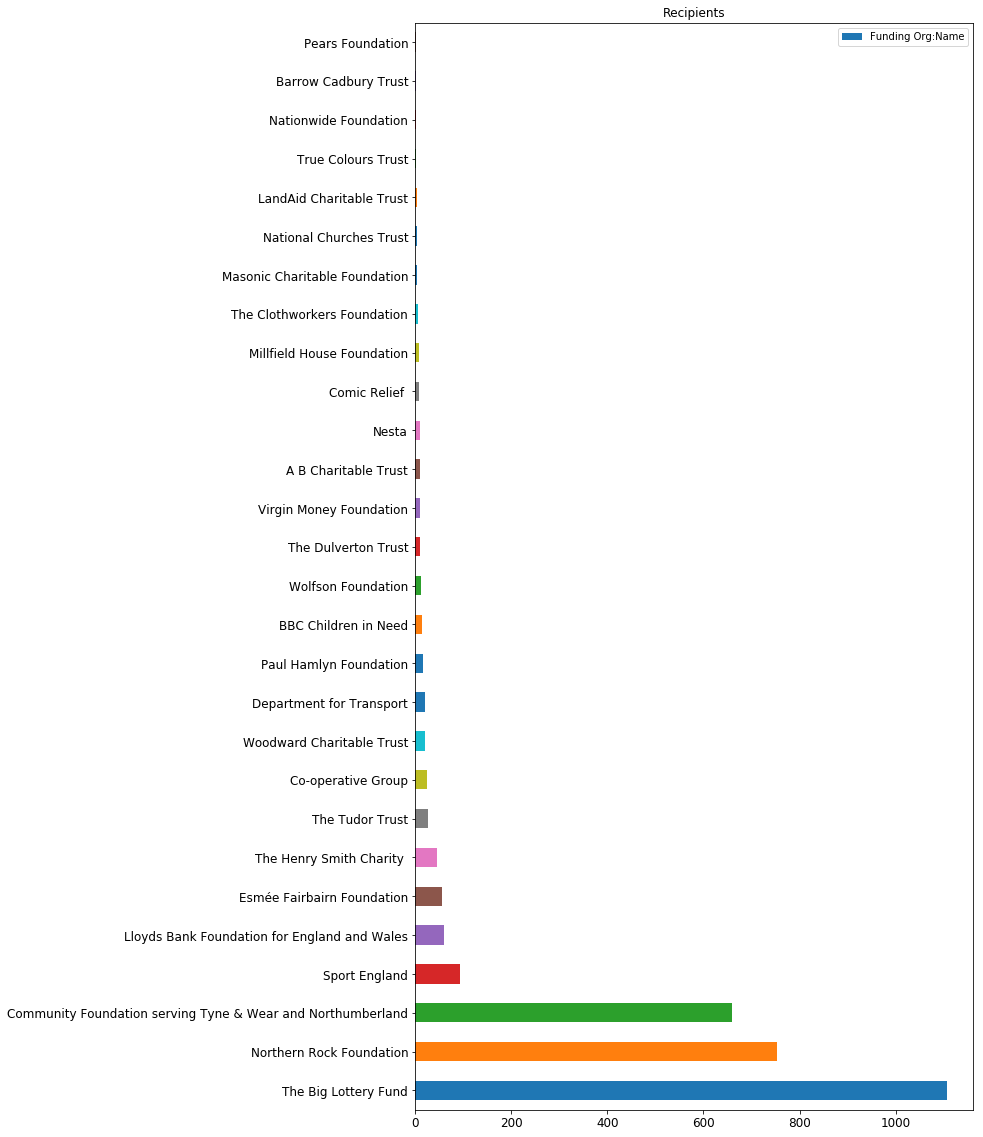

In [13]:
ax = df[df['Recipient District Geographic Code'] == 'E08000021']['Funding Org:Name'].value_counts().plot(kind='barh', \
                                 title ="Recipients", figsize=(10,20),legend=True, fontsize=12)

In [14]:
df[df['Recipient District Geographic Code'] == 'E08000021']

,Identifier,Title,Description,Currency,Amount Applied For,Amount Awarded,Amount Disbursed,Award Date,URL,Planned Dates:Start Date,...,License (see note),"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information.",Description_Orig,income,employment,education,health,crime,housing,environment
209,360G-SE-2010009852LOTT,Talent Development of Age Group Swimmers,funding under sport england's small grants fun...,GBP,NaN,9954.0,9954.0,2010-12-15T00:00:00+00:00,NaN,2010-12-01T00:00:00+00:00,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,funding under sport england's small grants fun...,False,False,False,False,False,False,False
499,360G-SE-2010011852LOTT,WASPS - FEEL THE BUZZ,funding under sport england's small grants fun...,GBP,NaN,8793.0,8793.0,2011-02-17T00:00:00+00:00,NaN,2011-02-21T00:00:00+00:00,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,funding under sport england's small grants fun...,False,False,False,False,False,False,False
594,360G-SE-2010012398LOTT,Street Swords,funding under sport england's small grants fun...,GBP,NaN,8567.0,8567.0,2011-03-16T00:00:00+00:00,NaN,2011-04-01T00:00:00+00:00,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,funding under sport england's small grants fun...,False,False,False,False,False,False,False
601,360G-SE-2010006976LOTT,NCL Active - The alternative sports programme,funding under sport england's themed round 4 f...,GBP,NaN,124596.0,124596.0,2011-05-03T00:00:00+00:00,NaN,2011-06-01T00:00:00+00:00,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,funding under sport england's themed round 4 f...,False,False,False,False,False,False,False
1242,360G-tudortrust-84640,Grant to Scotswood Natural Community Garden Li...,over three years as an unrestricted grant to a...,GBP,NaN,90000.0,30000.0,2017-05-25T00:00:00+00:00,http://www.sncg.org.uk,2017-06-01T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,over three years as an unrestricted grant to a...,False,False,False,False,False,False,False
2209,360G-SE-2009115586LOTT,After School Sport Clubs,funding under sport england's small grants fun...,GBP,NaN,5715.0,5715.0,2009-11-30T00:00:00+00:00,NaN,2010-01-04T00:00:00+00:00,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,funding under sport england's small grants fun...,False,False,False,False,False,False,False
2506,360G-SE-2009100256LOTT,"To get ""Newcastle Wrestling Club"" off the ground.",funding under sport england's small grants fun...,GBP,NaN,9830.0,9830.0,2009-04-30T00:00:00+00:00,NaN,2009-06-30T00:00:00+00:00,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,funding under sport england's small grants fun...,False,False,False,False,False,False,False
3952,360G-cabinetoffice-GA-059838,English Community Transport 2016/17,placeholder,GBP,NaN,3858.0,NaN,2016-04-01T00:00:00+00:00,NaN,2016-04-01,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,placeholder,False,False,False,False,False,False,False
4089,360G-ABCT-006b000000DgeonAAB,Housing and support for asylum seekers/refugees,"£10,000 towards running costs of housing projects",GBP,NaN,10000.0,NaN,2014-01-21T00:00:00+00:00,http://www.actionfoundation.org.uk,NaN,...,https://creativecommons.org/licenses/by/4.0/,NaN,"£10,000 towards running costs of housing projects",False,False,False,False,False,False,False
4099,360G-cabinetoffice-GA-059327,English Community Transport 2016/17,placeholder,GBP,NaN,3475.0,NaN,2016-04-01T00:00:00+00:00,NaN,2016-04-01,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,placeholder,False,False,False,False,False,False,False


In [15]:
df.loc[df['Description'].str.contains('health', na=False) | \
      df['Description'].str.contains('hospital', na=False) | \
       df['Description'].str.contains('clinic', na=False) | \
       df['Description'].str.contains('cancer', na=False) | \
       df['Description'].str.contains('disease', na=False)| \
       df['Description'].str.contains('disabled', na=False) | \
       df['Description'].str.contains('disability', na=False) | \
       df['Description'].str.contains('disabilities', na=False) | \
       \
      df['Title'].str.contains('health', na=False) | \
       df['Title'].str.contains('hospital', na=False) | \
       df['Title'].str.contains('clinic', na=False) | \
       df['Title'].str.contains('cancer', na=False) | \
       df['Title'].str.contains('disease', na=False) |\
       df['Title'].str.contains('disabled', na=False) | \
       df['Title'].str.contains('disability', na=False) | \
       df['Title'].str.contains('disabilities', na=False) \
      ,'health'] = True

In [16]:
df[(df['health'] == True)].describe()

,Amount Applied For,Amount Awarded,Amount Disbursed,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:Duration (months),Recipient Org:Location:2:Geographic Code Type,Recipient Org:Location:2:Geographic Code,Recipient Org:Location:2:Name,Beneficiary Location:3:Country Code,Beneficiary Location:4:Country Code,Beneficiary Location:5:Country Code,Beneficiary Location:6:Country Code,Beneficiary Location:7:Country Code,The following fields are not in the 360 Giving Standard and are added by GrantNav.,"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
count,2.683500e+04,5.016800e+04,1.363000e+03,39366.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.553605e+04,1.321622e+05,1.189937e+05,18.139359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.185158e+05,8.050028e+05,1.920133e+06,12.959468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.990000e+03,5.000000e+03,4.000000e+03,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.154000e+03,9.900000e+03,9.704000e+03,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000e+04,4.973150e+04,4.413450e+04,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.352897e+07,6.421457e+07,7.046207e+07,177.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.loc[(df['health'] == True) & (df['Recipient District Geographic Code'] == 'E08000021')]

,Identifier,Title,Description,Currency,Amount Applied For,Amount Awarded,Amount Disbursed,Award Date,URL,Planned Dates:Start Date,...,License (see note),"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information.",Description_Orig,income,employment,education,health,crime,housing,environment
4820,360G-MasonicCharitableFdn-SG000026,Core funding,integrated projects for people with disabiliti...,GBP,NaN,3500.0,NaN,2016-07-20T00:00:00+00:00,NaN,NaN,...,https://creativecommons.org/licenses/by/4.0/,NaN,integrated projects for people with disabiliti...,False,False,False,True,False,False,False
8885,360G-blf-0031060960,Wellness 4 Black & Minority Ethnic (BME),the group will provide wellness motivational s...,GBP,NaN,9970.0,NaN,2018-05-30,NaN,2018-06-14,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,the group will provide wellness motivational s...,False,False,False,True,False,False,False
10430,360G-tudortrust-86388,Grant to Newcastle & Gateshead Arts Studio Ltd,over three years towards core costs at an arts...,GBP,NaN,75000.0,25000.0,2018-01-18T00:00:00+00:00,http://www.chillistudios.co.uk,2018-01-18T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,over three years towards core costs at an arts...,False,False,False,True,False,False,False
10955,360G-SE-2013018175LOTT,GET EQUIPPED,funding under sport england's get equipped fun...,GBP,NaN,3500.0,3500.0,2014-04-29T00:00:00+00:00,NaN,2014-01-15T00:00:00+00:00,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,funding under sport england's get equipped fun...,False,False,False,True,False,False,False
11028,360G-blf-0031061561,Growing Strong,the group will provide a programme to help adu...,GBP,NaN,34465.0,NaN,2018-06-18,NaN,2018-06-21,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,the group will provide a programme to help adu...,False,False,False,True,False,False,False
11809,360G-SE-2013020638LOTT,"New entrance, steps, ramp, car parking and sco...",funding under sport england's inspired facilit...,GBP,NaN,50000.0,50000.0,2014-04-15T00:00:00+00:00,NaN,2014-09-15T00:00:00+00:00,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,funding under sport england's inspired facilit...,False,False,False,True,False,False,False
11963,360G-northernrock:2625,Grant awarded to Leonard Cheshire in Northumbr...,towards the core costs of a leisure and sport ...,GBP,150275.0,112404.0,NaN,2006-03-14T00:00:00+00:00,NaN,2006-03-14T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,towards the core costs of a leisure and sport ...,False,False,False,True,False,False,False
12115,360G-northernrock:2774,Grant awarded to Community Action on Health (T...,to pilot and evaluate a programme to help non-...,GBP,14676.0,14676.0,NaN,2006-03-10T00:00:00+00:00,NaN,2006-04-05T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,to pilot and evaluate a programme to help non-...,False,False,False,True,False,False,False
12488,360G-blf-0031062144,The Opportunity Café,the funding will be used to create an easy rea...,GBP,NaN,10000.0,NaN,2018-07-04,NaN,2018-07-18,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,the funding will be used to create an easy rea...,False,False,False,True,False,False,False
12811,360G-northernrock:3418,Grant awarded to Pen and Tonic (Tyne & Wear),towards the core costs of a writing for health...,GBP,15398.0,10000.0,NaN,2009-02-27T00:00:00+00:00,NaN,2009-05-01T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,towards the core costs of a writing for health...,False,False,False,True,False,False,False


In [18]:
df.loc[df['Description'].str.contains('income', na=False) | \
       df['Description'].str.contains('debt', na=False) | \
       df['Description'].str.contains('financial', na=False) | \
        \
      df['Title'].str.contains('income', na=False) |\
      df['Title'].str.contains('debt', na=False) |\
      df['Title'].str.contains('financial', na=False) \
      ,'income'] = True

In [19]:
df[(df['income'] == True)].describe()

,Amount Applied For,Amount Awarded,Amount Disbursed,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:Duration (months),Recipient Org:Location:2:Geographic Code Type,Recipient Org:Location:2:Geographic Code,Recipient Org:Location:2:Name,Beneficiary Location:3:Country Code,Beneficiary Location:4:Country Code,Beneficiary Location:5:Country Code,Beneficiary Location:6:Country Code,Beneficiary Location:7:Country Code,The following fields are not in the 360 Giving Standard and are added by GrantNav.,"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
count,2.530000e+03,4.415000e+03,82.000000,3539.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.360421e+05,1.405220e+05,47051.327195,23.853066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.041573e+06,5.053399e+05,53567.907832,16.791607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,2.000000e+02,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.000000e+03,6.585000e+03,6250.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000e+04,1.000000e+04,30000.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.489052e+05,1.331275e+05,68468.750000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.100000e+07,1.745501e+07,250000.000000,192.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.loc[(df['income'] == True) & (df['Recipient District Geographic Code'] == 'E08000021')]

,Identifier,Title,Description,Currency,Amount Applied For,Amount Awarded,Amount Disbursed,Award Date,URL,Planned Dates:Start Date,...,License (see note),"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information.",Description_Orig,income,employment,education,health,crime,housing,environment
16383,360G-northernrock:787,Grant awarded to Church Action on Poverty Nort...,towards a debt reduction project in the asian ...,GBP,4080.00,4080.0,NaN,2000-09-25T00:00:00+00:00,NaN,2000-10-17T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,towards a debt reduction project in the asian ...,True,False,False,False,False,False,False
16864,360G-northernrock:4229,Grant awarded to North of England Refugee Serv...,"to carry out a financial review, clarifying re...",GBP,2500.00,2500.0,NaN,2013-10-18T00:00:00+00:00,NaN,2013-10-02T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,"to carry out a financial review, clarifying re...",True,False,False,False,False,False,False
18174,360G-northernrock:1807,Grant awarded to Moneywise Newcastle Credit Un...,to employ a part-time development worker and a...,GBP,29325.00,29325.0,NaN,2003-09-30T00:00:00+00:00,NaN,2003-09-30T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,to employ a part-time development worker and a...,True,False,False,False,False,False,False
18820,360G-northernrock:2452,Grant awarded to Financial Inclusion Newcastle...,to research current provision for addressing f...,GBP,15000.00,15000.0,NaN,2005-04-19T00:00:00+00:00,NaN,2005-04-19T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,to research current provision for addressing f...,True,False,False,False,False,False,False
21923,360G-EFF-08-4813,Social investment Live Theatre,an investment in live theatre to develop socia...,GBP,NaN,140000.0,NaN,2010-10-14T00:00:00.000Z,http://www.live.org.uk,NaN,...,https://creativecommons.org/licenses/by/4.0/,NaN,an investment in live theatre to develop socia...,True,False,False,False,False,False,False
24642,360G-blf-0031054740,Walker Traders,the project will engage vulnerable women – suc...,GBP,NaN,9840.0,NaN,2017-11-22,NaN,2017-11-27,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,the project will engage vulnerable women – suc...,True,False,False,True,False,False,False
34183,360G-northernrock:3994,Grant awarded to Phoenix Mentoring Project K/A...,towards employing a consultant to devise a fin...,GBP,2000.00,2000.0,NaN,2012-03-29T00:00:00+00:00,NaN,2012-03-30T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,towards employing a consultant to devise a fin...,True,False,False,False,False,False,False
35339,360G-northernrock:4152,Grant awarded to PROPS North East (Tyne & Wear),to work with bright purpose to assist with man...,GBP,1100.00,1100.0,NaN,2013-04-22T00:00:00+00:00,NaN,2013-04-22T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,to work with bright purpose to assist with man...,True,False,False,False,False,False,False
39836,360G-CFTyneWearNland-161210,Towards Financial literacy for young mothers l...,towards financial literacy for young mothers l...,GBP,3979.00,3979.0,NaN,2015-12-08T00:00:00+00:00,NaN,NaN,...,https://creativecommons.org/licenses/by/4.0/,NaN,towards financial literacy for young mothers l...,True,False,False,False,False,False,False
40017,360G-northernrock:1281,Grant awarded to Mobex North East (North East),to cover loss of income.,GBP,7358.37,7350.0,NaN,2001-10-22T00:00:00+00:00,NaN,2001-10-22T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,to cover loss of income.,True,False,False,False,False,False,False


In [21]:
df.loc[df['Description'].str.contains('employment', na=False) | \
       df['Description'].str.contains('job', na=False) | \
        \
      df['Title'].str.contains('employment', na=False) | \
      df['Title'].str.contains('job', na=False) \
      ,'employment'] = True

In [22]:
df[(df['employment'] == True)].describe()

,Amount Applied For,Amount Awarded,Amount Disbursed,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:Duration (months),Recipient Org:Location:2:Geographic Code Type,Recipient Org:Location:2:Geographic Code,Recipient Org:Location:2:Name,Beneficiary Location:3:Country Code,Beneficiary Location:4:Country Code,Beneficiary Location:5:Country Code,Beneficiary Location:6:Country Code,Beneficiary Location:7:Country Code,The following fields are not in the 360 Giving Standard and are added by GrantNav.,"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
count,5.164000e+03,8.317000e+03,127.000000,7751.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.165750e+05,1.089123e+05,55753.392835,21.474906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.965876e+05,3.938357e+05,70189.544154,14.990607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,6.000000e+01,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.675000e+03,9.100000e+03,20000.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.996000e+03,1.000000e+04,36819.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.150150e+05,7.600000e+04,57744.500000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.100000e+07,1.745501e+07,464154.000000,144.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.loc[(df['employment'] == True) & (df['Recipient District Geographic Code'] == 'E08000021')]

,Identifier,Title,Description,Currency,Amount Applied For,Amount Awarded,Amount Disbursed,Award Date,URL,Planned Dates:Start Date,...,License (see note),"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information.",Description_Orig,income,employment,education,health,crime,housing,environment
8869,360G-blf-0031061896,Improving softer skills for employment,the funding will be used to run weekly trainin...,GBP,NaN,9920.00,NaN,2018-06-27,NaN,2018-07-11,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,the funding will be used to run weekly trainin...,False,True,False,False,False,False,False
11772,360G-blf-0031060980,Volunteer Programme,the group will recruit volunteers and give the...,GBP,NaN,9600.00,NaN,2018-05-30,NaN,2018-06-15,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,the group will recruit volunteers and give the...,False,True,False,False,False,False,False
11865,360G-northernrock:2530,Grant awarded to St. Anthony of Padua Communit...,towards a project finding employment for refug...,GBP,330000.00,330000.00,NaN,2005-07-12T00:00:00+00:00,NaN,2005-07-12T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,towards a project finding employment for refug...,False,True,False,False,False,False,False
13617,360G-northernrock:2310,Grant awarded to Henshaws Society for Blind Pe...,to fund a training programme to help unemploye...,GBP,71491.00,71491.00,NaN,2004-10-05T00:00:00+00:00,NaN,2004-10-05T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,to fund a training programme to help unemploye...,False,True,False,False,False,False,False
14422,360G-blf-0031060598,Volunteer Development Project,the group will provide support to young people...,GBP,NaN,8057.00,NaN,2018-05-16,NaN,2018-06-04,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,the group will provide support to young people...,False,True,False,True,False,False,False
16234,360G-northernrock:646,Grant awarded to Newcastle Healthy City Ltd (T...,"to develop e-commerce, employment and training...",GBP,45360.00,40000.00,NaN,2000-05-09T00:00:00+00:00,NaN,2000-05-09T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,"to develop e-commerce, employment and training...",False,True,False,False,False,False,False
18085,360G-EFF-11-3092,Grant to Riverside Community Health Project,towards the migrant families inclusion project...,GBP,NaN,30000.00,NaN,2012-05-29T00:00:00.000Z,http://www.riversidecreditunion.co.uk,NaN,...,https://creativecommons.org/licenses/by/4.0/,NaN,towards the migrant families inclusion project...,False,True,False,False,False,False,False
18363,360G-CFTyneWearNland-161718,Towards Running costs of an integration and em...,towards running costs of an integration and em...,GBP,44000.00,44000.00,NaN,2016-01-15T00:00:00+00:00,http://www.refugee.org.uk,NaN,...,https://creativecommons.org/licenses/by/4.0/,NaN,towards running costs of an integration and em...,False,True,False,False,False,False,False
21320,360G-northernrock:1082,Grant awarded to Rehab UK (North East),"to employ two support workers, based in newcas...",GBP,60900.00,60900.00,NaN,2001-06-12T00:00:00+00:00,NaN,2001-06-12T00:00:00+00:00,...,http://www.opendefinition.org/licenses/odc-pddl,NaN,"to employ two support workers, based in newcas...",False,True,False,False,False,False,False
28760,360G-blf-0031062863,Strategic Skills and Employment Support Scheme...,the funding will be used to run a series of sk...,GBP,NaN,8925.00,NaN,2018-07-24,NaN,2018-08-14,...,http://www.nationalarchives.gov.uk/doc/open-go...,NaN,the funding will be used to run a series of sk...,False,True,False,False,False,False,False


In [24]:
df.loc[df['Description'].str.contains('education', na=False) | \
       df['Description'].str.contains('academic', na=False) | \
       df['Description'].str.contains('school', na=False) | \
       df['Description'].str.contains('pupil', na=False) | \
        \
      df['Title'].str.contains('education', na=False) | \
       df['Title'].str.contains('academic', na=False) | \
       df['Title'].str.contains('school', na=False)  |\
       df['Title'].str.contains('pupil', na=False)  \
      ,'education'] = True

In [25]:
df[(df['education'] == True)].describe()

,Amount Applied For,Amount Awarded,Amount Disbursed,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:Duration (months),Recipient Org:Location:2:Geographic Code Type,Recipient Org:Location:2:Geographic Code,Recipient Org:Location:2:Name,Beneficiary Location:3:Country Code,Beneficiary Location:4:Country Code,Beneficiary Location:5:Country Code,Beneficiary Location:6:Country Code,Beneficiary Location:7:Country Code,The following fields are not in the 360 Giving Standard and are added by GrantNav.,"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
count,3.767000e+04,5.119300e+04,1.425000e+03,47305.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.345585e+04,5.312177e+04,1.637419e+05,15.658218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.181567e+05,5.111058e+05,1.993725e+06,10.241961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.550000e+03,4.572000e+03,5.000000e+03,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.534000e+03,8.749000e+03,2.000000e+04,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000e+04,1.000000e+04,6.424200e+04,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.039514e+07,6.421457e+07,7.046207e+07,131.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.loc[df['Description'].str.contains('crime', na=False) | \
       df['Description'].str.contains('security system', na=False) | \
       df['Description'].str.contains('criminal', na=False) | \
       df['Description'].str.contains('prison', na=False) | \
       df['Description'].str.contains('ex-offender', na=False) | \
       df['Description'].str.contains('police', na=False) | \
        \
      df['Title'].str.contains('crime', na=False) |\
      df['Title'].str.contains('security system', na=False) |\
      df['Title'].str.contains('criminal', na=False) |\
      df['Title'].str.contains('prison', na=False) |\
      df['Title'].str.contains('ex-offender', na=False) |\
      df['Title'].str.contains('police', na=False) \
      ,'crime'] = True

In [27]:
df[(df['crime'] == True)].describe()

,Amount Applied For,Amount Awarded,Amount Disbursed,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:Duration (months),Recipient Org:Location:2:Geographic Code Type,Recipient Org:Location:2:Geographic Code,Recipient Org:Location:2:Name,Beneficiary Location:3:Country Code,Beneficiary Location:4:Country Code,Beneficiary Location:5:Country Code,Beneficiary Location:6:Country Code,Beneficiary Location:7:Country Code,The following fields are not in the 360 Giving Standard and are added by GrantNav.,"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
count,1.731000e+03,3.431000e+03,92.000000,2936.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.176372e+05,1.229186e+05,54737.004022,21.452997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.476071e+05,6.128188e+05,59007.655099,14.601387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.211060e+03,7.727500e+03,6500.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.980000e+03,1.000000e+04,32584.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.050000e+05,8.702900e+04,82755.500000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.294256e+07,2.588000e+07,300000.000000,156.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.loc[df['Description'].str.contains('housing', na=False) | \
       df['Description'].str.contains('homeless', na=False) | \
       df['Description'].str.contains(' homes', na=False) | \
        \
      df['Title'].str.contains('housing', na=False) |\
       df['Title'].str.contains('homeless', na=False) |\
       df['Title'].str.contains(' homes', na=False) \
      ,'housing'] = True

In [29]:
df[(df['housing'] == True)].describe()

,Amount Applied For,Amount Awarded,Amount Disbursed,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:Duration (months),Recipient Org:Location:2:Geographic Code Type,Recipient Org:Location:2:Geographic Code,Recipient Org:Location:2:Name,Beneficiary Location:3:Country Code,Beneficiary Location:4:Country Code,Beneficiary Location:5:Country Code,Beneficiary Location:6:Country Code,Beneficiary Location:7:Country Code,The following fields are not in the 360 Giving Standard and are added by GrantNav.,"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
count,3.584000e+03,6.668000e+03,166.000000,5262.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.342132e+05,1.409725e+05,45909.710843,24.158495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.772655e+05,1.267244e+06,65729.207612,16.347583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000e+03,4.980000e+03,4250.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.990500e+03,9.998000e+03,26000.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.450570e+05,9.000000e+04,50000.000000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.566950e+07,7.500000e+07,464154.000000,120.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.loc[df['Description'].str.contains('environmental', na=False) | \
       df['Description'].str.contains('natural environment', na=False) | \
       df['Description'].str.contains('the environment', na=False) | \
       df['Description'].str.contains(' tree', na=False) | \
       df['Description'].str.contains('garden', na=False) | \
        \
      df['Title'].str.contains('environmental', na=False) | \
       df['Title'].str.contains('natural environment', na=False) | \
       df['Title'].str.contains('the environment', na=False) | \
       df['Title'].str.contains(' tree', na=False) | \
       df['Title'].str.contains('garden', na=False) \
      ,'environment'] = True

In [31]:
df[(df['environment'] == True)].describe()

,Amount Applied For,Amount Awarded,Amount Disbursed,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:Duration (months),Recipient Org:Location:2:Geographic Code Type,Recipient Org:Location:2:Geographic Code,Recipient Org:Location:2:Name,Beneficiary Location:3:Country Code,Beneficiary Location:4:Country Code,Beneficiary Location:5:Country Code,Beneficiary Location:6:Country Code,Beneficiary Location:7:Country Code,The following fields are not in the 360 Giving Standard and are added by GrantNav.,"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
count,8.444000e+03,1.172400e+04,105.000000,10296.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5.926227e+04,7.345570e+04,38503.257619,14.867424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.170311e+06,8.623645e+05,79968.467625,9.369497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.691250e+03,4.644750e+03,500.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.669000e+03,8.613600e+03,15000.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000e+04,1.000000e+04,44570.720000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.000000e+07,5.790840e+07,500000.000000,123.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df[(df['income'] == True) |\
    (df['employment'] == True) |\
    (df['education'] == True) |\
    (df['health'] == True) |\
    (df['crime'] == True) |\
    (df['housing'] == True) |\
    (df['environment'] == True) \
  ]

,Identifier,Title,Description,Currency,Amount Applied For,Amount Awarded,Amount Disbursed,Award Date,URL,Planned Dates:Start Date,...,License (see note),"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information.",Description_Orig,income,employment,education,health,crime,housing,environment
10,360G-Wellcome-094836_Z_10_Z,Specific language impairment and comorbidity: ...,this research aims to investigate the developm...,GBP,NaN,507698.00,NaN,2011-03-03T00:00:00+00:00,NaN,2012-03-01T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,this research aims to investigate the developm...,False,False,True,False,False,False,False
12,360G-Wellcome-094780_Z_10_Z,Development of a ready-to-use nutraceutical fo...,vasculopathy generates serious morbidity in ol...,GBP,NaN,492829.00,NaN,2011-03-15T00:00:00+00:00,NaN,2011-06-01T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,vasculopathy generates serious morbidity in ol...,False,False,False,True,False,False,False
15,360G-Wellcome-094664_Z_10_Z,Wolbachia as a defence against RNA viruses in ...,the bacterial endosymbiont wolbachia protects ...,GBP,NaN,548004.00,NaN,2011-03-07T00:00:00+00:00,NaN,2011-10-24T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,the bacterial endosymbiont wolbachia protects ...,False,False,False,True,False,False,False
17,360G-Wellcome-094527_Z_10_Z,Coupling Influenza Genetic and Epidemiological...,the first goal of the project is to use molecu...,GBP,NaN,262342.00,NaN,2011-03-07T00:00:00+00:00,NaN,2012-01-03T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,the first goal of the project is to use molecu...,False,False,False,True,False,False,True
20,360G-Wellcome-080432_Z_06_Z,Touching Science.,touching science this project stems from our ...,GBP,NaN,10613.00,NaN,2006-06-22T00:00:00+00:00,NaN,2006-09-18T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,touching science this project stems from our ...,False,False,True,False,False,False,False
21,360G-Wellcome-080407_Z_06_Z,Bio-mation.,bio-mation: animation information by patients ...,GBP,NaN,49973.00,NaN,2006-06-22T00:00:00+00:00,NaN,2006-09-04T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,bio-mation: animation information by patients ...,False,False,True,True,False,False,False
22,360G-Wellcome-080201_Z_06_Z,From communication to deliberation: the impact...,the goal of the proposed research is to provid...,GBP,NaN,226276.00,NaN,2006-07-11T00:00:00+00:00,NaN,2006-09-01T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,the goal of the proposed research is to provid...,False,False,True,False,False,False,False
23,360G-Wellcome-080065_Z_06_Z,The effect of biomass fuel smoke on pulmonary ...,one third of the world s population uses bioma...,GBP,NaN,526053.00,NaN,2006-05-09T00:00:00+00:00,NaN,2006-09-01T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,one third of the world s population uses bioma...,False,False,False,False,False,False,True
24,360G-Wellcome-079662_Z_06_Z,Ibadan Study of Aging: Profile and Determinant...,the health outcomes of the elderly population ...,GBP,NaN,340893.00,NaN,2006-05-16T00:00:00+00:00,NaN,2006-10-01T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,the health outcomes of the elderly population ...,False,False,False,True,False,False,True
25,360G-Wellcome-079594_Z_06_Z,The multiple ethics of umbilical cord banking.,following the discovery of pluripotent haemato...,GBP,NaN,20750.00,NaN,2006-04-26T00:00:00+00:00,NaN,2006-06-01T00:00:00+00:00,...,https://creativecommons.org/licenses/by/4.0/,NaN,following the discovery of pluripotent haemato...,False,False,False,True,False,False,False


In [33]:
df[(df['income'] == True) |\
    (df['employment'] == True) |\
    (df['education'] == True) |\
    (df['health'] == True) |\
    (df['crime'] == True) |\
    (df['housing'] == True) |\
    (df['environment'] == True) \
  ]['Amount Awarded'].sum()

10056307723.157799

In [34]:
df[(df['income'] == False) &\
    (df['employment'] == False) &\
    (df['education'] == False) &\
    (df['health'] == False) &\
    (df['crime'] == False) &\
    (df['housing'] == False) &\
    (df['environment'] == False)  \
  ].describe()

,Amount Applied For,Amount Awarded,Amount Disbursed,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:Duration (months),Recipient Org:Location:2:Geographic Code Type,Recipient Org:Location:2:Geographic Code,Recipient Org:Location:2:Name,Beneficiary Location:3:Country Code,Beneficiary Location:4:Country Code,Beneficiary Location:5:Country Code,Beneficiary Location:6:Country Code,Beneficiary Location:7:Country Code,The following fields are not in the 360 Giving Standard and are added by GrantNav.,"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
count,1.123070e+05,1.912560e+05,1.890200e+04,156429.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.284701e+04,8.354679e+04,1.698105e+05,15.133639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.876581e+05,3.387236e+06,1.717368e+06,11.191992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.965000e+03,2.450000e+03,4.027000e+03,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000e+03,6.680000e+03,1.000000e+04,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.905000e+03,1.000000e+04,4.819300e+04,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.968735e+08,1.418364e+09,1.123000e+08,1080.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df[(df['income'] == False) &\
    (df['employment'] == False) &\
    (df['education'] == False) &\
    (df['health'] == False) &\
    (df['crime'] == False) &\
    (df['housing'] == False) &\
    (df['environment'] == False) 
  ].describe()

,Amount Applied For,Amount Awarded,Amount Disbursed,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:Duration (months),Recipient Org:Location:2:Geographic Code Type,Recipient Org:Location:2:Geographic Code,Recipient Org:Location:2:Name,Beneficiary Location:3:Country Code,Beneficiary Location:4:Country Code,Beneficiary Location:5:Country Code,Beneficiary Location:6:Country Code,Beneficiary Location:7:Country Code,The following fields are not in the 360 Giving Standard and are added by GrantNav.,"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
count,1.123070e+05,1.912560e+05,1.890200e+04,156429.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.284701e+04,8.354679e+04,1.698105e+05,15.133639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.876581e+05,3.387236e+06,1.717368e+06,11.191992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.965000e+03,2.450000e+03,4.027000e+03,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000e+03,6.680000e+03,1.000000e+04,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.905000e+03,1.000000e+04,4.819300e+04,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.968735e+08,1.418364e+09,1.123000e+08,1080.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df[(df['income'] == False) &\
    (df['employment'] == False) &\
    (df['education'] == False) &\
    (df['health'] == False) &\
    (df['crime'] == False) &\
    (df['housing'] == False) &\
    (df['environment'] == False) 
  ]['Amount Awarded'].sum()

15978824496.41

In [37]:
themes_df = df[(df['income'] == True) |\
    (df['employment'] == True) |\
    (df['education'] == True) |\
    (df['health'] == True) |\
    (df['crime'] == True) |\
    (df['housing'] == True) |\
    (df['environment'] == True) \
  ]

In [38]:
#ax = themes_df[themes_df['income'] == True]['Recipient District Geographic Code'].value_counts().plot(kind='barh', \
#                                 title ="Recipients", figsize=(10,70),legend=True, fontsize=12)

In [39]:
#ax = themes_df[themes_df['employment'] == True]['Recipient District Geographic Code'].value_counts().plot(kind='barh', \
#                                 title ="Recipients", figsize=(10,70),legend=True, fontsize=12)

In [40]:
#ax = themes_df[themes_df['education'] == True]['Recipient District Geographic Code'].value_counts().plot(kind='barh', \
#                                 title ="Recipients", figsize=(10,70),legend=True, fontsize=12)

In [41]:
#ax = themes_df[themes_df['health'] == True]['Recipient District Geographic Code'].value_counts().plot(kind='barh', \
#                                 title ="Recipients", figsize=(10,70),legend=True, fontsize=12)

In [42]:
#ax = themes_df[themes_df['crime'] == True]['Recipient District Geographic Code'].value_counts().plot(kind='barh', \
#                                 title ="Recipients", figsize=(10,70),legend=True, fontsize=12)

In [43]:
#ax = themes_df[themes_df['housing'] == True]['Recipient District Geographic Code'].value_counts().plot(kind='barh', \
#                                 title ="Recipients", figsize=(10,70),legend=True, fontsize=12)

In [44]:
#ax = themes_df[themes_df['environment'] == True]['Recipient District Geographic Code'].value_counts().plot(kind='barh', \
#                                 title ="Recipients", figsize=(10,70),legend=True, fontsize=12)

## Read Deprivation Index Data

In [45]:
dp_df = []

dp_df.append(pd.read_excel('../data/File_10_ID2015_Local_Authority_District_Summaries.xlsx', sheet_name='IMD', index_col=[0,1]))
dp_df.append(pd.read_excel('../data/File_10_ID2015_Local_Authority_District_Summaries.xlsx', sheet_name='Employment', index_col=[0,1]))
dp_df.append(pd.read_excel('../data/File_10_ID2015_Local_Authority_District_Summaries.xlsx', sheet_name='Income', index_col=[0,1]))
dp_df.append(pd.read_excel('../data/File_10_ID2015_Local_Authority_District_Summaries.xlsx', sheet_name='Education', index_col=[0,1]))
dp_df.append(pd.read_excel('../data/File_10_ID2015_Local_Authority_District_Summaries.xlsx', sheet_name='Health', index_col=[0,1]))
dp_df.append(pd.read_excel('../data/File_10_ID2015_Local_Authority_District_Summaries.xlsx', sheet_name='Barriers', index_col=[0,1]))
dp_df.append(pd.read_excel('../data/File_10_ID2015_Local_Authority_District_Summaries.xlsx', sheet_name='Crime', index_col=[0,1]))
dp_df.append(pd.read_excel('../data/File_10_ID2015_Local_Authority_District_Summaries.xlsx', sheet_name='Living', index_col=[0,1]))


In [46]:
dp_df[0]

,,IMD - Average rank,IMD - Rank of average rank,IMD - Average score,IMD - Rank of average score,IMD - Proportion of LSOAs in most deprived 10% nationally,IMD - Rank of proportion of LSOAs in most deprived 10% nationally,IMD - Extent,IMD - Rank of extent,IMD - Local concentration,IMD - Rank of local concentration
Local Authority District code (2013),Local Authority District name (2013),,,,,,,,,,
E06000001,Hartlepool,21886.60,32,33.178,18,0.3276,10,0.4589,17,32428.23,14
E06000002,Middlesbrough,23562.71,16,40.216,6,0.4884,1,0.5604,5,32745.35,2
E06000003,Redcar and Cleveland,19716.01,78,28.567,49,0.2159,33,0.3394,48,32420.92,15
E06000004,Stockton-on-Tees,17046.82,130,24.625,88,0.1833,47,0.2799,69,32202.56,27
E06000005,Darlington,17423.32,122,23.639,97,0.1538,58,0.2438,84,31736.09,50
E06000006,Halton,21563.08,36,31.943,27,0.2658,19,0.4494,19,32271.27,22
E06000007,Warrington,14411.14,176,19.312,147,0.0945,90,0.1849,117,30962.25,88
E06000008,Blackburn with Darwen,22896.14,24,34.189,15,0.3077,12,0.5001,13,32336.37,20
E06000009,Blackpool,25692.67,4,41.997,1,0.3830,7,0.5075,12,32832.78,1


In [47]:
dp_df_combined = pd.concat([dp_df[0], dp_df[1], dp_df[2], dp_df[3], dp_df[4], dp_df[5], dp_df[6], dp_df[7]], axis=1)

In [48]:
dp_df_combined.head()

,,IMD - Average rank,IMD - Rank of average rank,IMD - Average score,IMD - Rank of average score,IMD - Proportion of LSOAs in most deprived 10% nationally,IMD - Rank of proportion of LSOAs in most deprived 10% nationally,IMD - Extent,IMD - Rank of extent,IMD - Local concentration,IMD - Rank of local concentration,...,Crime - Average score,Crime - Rank of average score,Crime - Proportion of LSOAs in most deprived 10% nationally,Crime - Rank of proportion of LSOAs in most deprived 10% nationally,Living Environment - Average rank,Living Environment - Rank of average rank,Living Environment - Average score,Living Environment - Rank of average score,Living Environment - Proportion of LSOAs in most deprived 10% nationally,Living Environment - Rank of proportion of LSOAs in most deprived 10% nationally
Local Authority District code (2013),Local Authority District name (2013),,,,,,,,,,,,,,,,,,,,,
E06000001,Hartlepool,21886.60,32,33.178,18,0.3276,10,0.4589,17,32428.23,14,...,0.078,107,0.1207,72,6723.11,309,8.260,306,0.0000,232
E06000002,Middlesbrough,23562.71,16,40.216,6,0.4884,1,0.5604,5,32745.35,2,...,0.633,20,0.3837,10,10521.28,258,12.907,255,0.0116,219
E06000003,Redcar and Cleveland,19716.01,78,28.567,49,0.2159,33,0.3394,48,32420.92,15,...,-0.013,129,0.1023,89,6150.27,311,7.923,311,0.0114,222
E06000004,Stockton-on-Tees,17046.82,130,24.625,88,0.1833,47,0.2799,69,32202.56,27,...,-0.263,189,0.0250,175,5674.10,315,7.068,316,0.0083,228
E06000005,Darlington,17423.32,122,23.639,97,0.1538,58,0.2438,84,31736.09,50,...,0.224,77,0.0923,97,9002.91,281,10.710,285,0.0000,232


In [49]:
dp_df_combined = dp_df_combined[['IMD - Rank of average score', \
                               'Employment - Rank of average score', \
                               'Income - Rank of average score', \
                               'Education, Skills and Training - Rank of average score', \
                               'Health Deprivation and Disability - Rank of average score', \
                               'Barriers to Housing and Services - Rank of average score', \
                               'Crime - Rank of average score', \
                               'Living Environment - Rank of average score',\
                                'IMD - Average score', \
                               'Employment - Average score', \
                               'Income - Average score', \
                               'Education, Skills and Training - Average score', \
                               'Health Deprivation and Disability - Average score', \
                               'Barriers to Housing and Services - Average score', \
                               'Crime - Average score', \
                               'Living Environment - Average score']]

dp_df_combined.rename(index=str, columns={'IMD - Rank of average score' : 'imd_rank', \
                               'Employment - Rank of average score' : 'employment_rank', \
                               'Income - Rank of average score' : 'income_rank', \
                               'Education, Skills and Training - Rank of average score' : 'education_rank', \
                               'Health Deprivation and Disability - Rank of average score' : 'health_rank', \
                               'Barriers to Housing and Services - Rank of average score' : 'housing_rank', \
                               'Crime - Rank of average score' : 'crime_rank', \
                               'Living Environment - Rank of average score' : 'environment_rank',\
                                'IMD - Average score' : 'imd_score', \
                               'Employment - Average score' : 'employment_score', \
                               'Income - Average score' : 'income_score', \
                               'Education, Skills and Training - Average score' : 'education_score', \
                               'Health Deprivation and Disability - Average score' : 'health_score', \
                               'Barriers to Housing and Services - Average score' : 'housing_score', \
                               'Crime - Average score' : 'crime_score', \
                               'Living Environment - Average score' : 'environment_score'\
                                }, inplace=True)

In [50]:
dp_df_combined.reset_index(inplace=True)

In [51]:
dp_df_combined.head()

,Local Authority District code (2013),Local Authority District name (2013),imd_rank,employment_rank,income_rank,education_rank,health_rank,housing_rank,crime_rank,environment_rank,imd_score,employment_score,income_score,education_score,health_score,housing_score,crime_score,environment_score
0,E06000001,Hartlepool,18,4,11,47,18,306,107,306,33.178,0.211,0.239,30.510,0.929,13.128,0.078,8.260
1,E06000002,Middlesbrough,6,3,2,3,6,243,20,255,40.216,0.216,0.268,40.640,1.195,18.316,0.633,12.907
2,E06000003,Redcar and Cleveland,49,12,33,71,29,309,129,311,28.567,0.186,0.204,27.875,0.752,12.863,-0.013,7.923
3,E06000004,Stockton-on-Tees,88,47,61,110,55,254,189,316,24.625,0.156,0.177,24.637,0.548,17.844,-0.263,7.068
4,E06000005,Darlington,97,54,73,129,62,313,77,285,23.639,0.150,0.168,22.569,0.502,12.346,0.224,10.710


## Pivot Funding Data

In [52]:
themes_df.columns

Index(['Identifier', 'Title', 'Description', 'Currency', 'Amount Applied For',
       'Amount Awarded', 'Amount Disbursed', 'Award Date', 'URL',
       'Planned Dates:Start Date', 'Planned Dates:End Date',
       'Planned Dates:Duration (months)', 'Actual Dates:Start Date',
       'Actual Dates:End Date', 'Actual Dates:Duration (months)',
       'Recipient Org:Identifier', 'Recipient Org:Name',
       'Recipient Org:Charity Number', 'Recipient Org:Company Number',
       'Recipient Org:Postal Code',
       'Recipient Org:Location:0:Geographic Code Type',
       'Recipient Org:Location:0:Geographic Code',
       'Recipient Org:Location:0:Name',
       'Recipient Org:Location:1:Geographic Code Type',
       'Recipient Org:Location:1:Geographic Code',
       'Recipient Org:Location:1:Name',
       'Recipient Org:Location:2:Geographic Code Type',
       'Recipient Org:Location:2:Geographic Code',
       'Recipient Org:Location:2:Name', 'Funding Org:Identifier',
       'Funding Org:Name', '

In [53]:
themes_pivot_df = themes_df[['Identifier', 'Title', 'Description', 'Currency',
       'Amount Applied For', 'Amount Awarded', 'Amount Disbursed',
       'Award Date', 'URL', 'Recipient Org:Identifier',
       'Recipient Org:Name', 'Recipient Org:Charity Number',
       'Recipient Org:Company Number', 'Recipient Org:Postal Code',
       'Data Source', 'Publisher:Name', 'Recipient Region',
       'Recipient District', 'Recipient District Geographic Code',
       'Recipient Ward', 'Recipient Ward Geographic Code',
       'Description_Orig',  'income', 'employment', 'education', 'health',
       'crime', 'housing', 'environment']]

In [54]:
aggregagations = {'Identifier': 'count',      
                 'Amount Applied For': "sum",
                  'Amount Awarded': 'sum',
                  'Amount Disbursed': 'sum'}

themes_pivot_df = pd.pivot_table(themes_pivot_df, index=['Recipient District Geographic Code',\
    'income', 'employment', 'education', 'health', 'crime', 'housing', 'environment'], aggfunc = aggregagations) #, aggfunc='sum')

In [55]:
themes_pivot_df.reset_index(inplace= True)

In [56]:
themes_pivot_df.head()

,Recipient District Geographic Code,income,employment,education,health,crime,housing,environment,Amount Applied For,Amount Awarded,Amount Disbursed,Identifier
0,E06000001,False,False,False,False,False,False,True,528353.0,533997.0,0.0,9
1,E06000001,False,False,False,False,False,True,False,591223.0,682886.0,49197.0,6
2,E06000001,False,False,False,False,True,False,False,49321.0,45000.0,0.0,1
3,E06000001,False,False,False,False,True,True,False,60000.0,30000.0,0.0,1
4,E06000001,False,False,False,True,False,False,False,1821818.0,3633668.0,29180.0,61


In [57]:
recomb_dfs = []

for i, t in enumerate(['income','employment','education','health','crime','housing','environment']):
    recomb_dfs.append(themes_pivot_df[['Recipient District Geographic Code',t,\
                    'Amount Applied For','Amount Awarded','Amount Disbursed','Identifier']] \
                .groupby(['Recipient District Geographic Code',t]).sum().reset_index())
    recomb_dfs[i] = recomb_dfs[i][recomb_dfs[i][t] == True]
    recomb_dfs[i].rename(columns={t: "theme",'Identifier': 'count'},inplace=True)
    recomb_dfs[i]['theme'] = t
    
                                      
    #display(recomb_dfs[i])

In [58]:
recomb_df = pd.concat([recomb_dfs[0], recomb_dfs[1], recomb_dfs[2], recomb_dfs[3], recomb_dfs[4], recomb_dfs[5], recomb_dfs[6]], axis=0)

In [59]:
recomb_df

,Recipient District Geographic Code,theme,Amount Applied For,Amount Awarded,Amount Disbursed,count
1,E06000001,income,1059152.0,1070623.00,49373.0,10
3,E06000002,income,3905337.0,3545524.14,0.0,13
5,E06000003,income,3391685.0,3005173.08,148275.0,14
7,E06000004,income,696085.0,1685961.00,0.0,20
9,E06000005,income,304313.0,4678140.00,0.0,5
11,E06000006,income,122195.0,135100.10,0.0,8
13,E06000007,income,431025.0,453867.15,0.0,9
15,E06000008,income,501450.0,951001.00,0.0,9
17,E06000009,income,1398195.0,1511343.00,0.0,8
19,E06000010,income,2230249.0,2124480.00,0.0,11


## Merge Funding and Deprivation Data

In [60]:
merged_df = pd.merge(recomb_df, dp_df_combined, \
                     left_on='Recipient District Geographic Code', \
                     right_on='Local Authority District code (2013)', how='outer')

In [61]:
#merged_df['country'] = merged_df['Recipient District Geographic Code'].astype(str).str[0]

In [62]:
merged_df[merged_df['theme'] == 'income']

,Recipient District Geographic Code,theme,Amount Applied For,Amount Awarded,Amount Disbursed,count,Local Authority District code (2013),Local Authority District name (2013),imd_rank,employment_rank,...,crime_rank,environment_rank,imd_score,employment_score,income_score,education_score,health_score,housing_score,crime_score,environment_score
0,E06000001,income,1059152.0,1070623.00,49373.0,10,E06000001,Hartlepool,18.0,4.0,...,107.0,306.0,33.178,0.211,0.239,30.510,0.929,13.128,0.078,8.260
7,E06000002,income,3905337.0,3545524.14,0.0,13,E06000002,Middlesbrough,6.0,3.0,...,20.0,255.0,40.216,0.216,0.268,40.640,1.195,18.316,0.633,12.907
14,E06000003,income,3391685.0,3005173.08,148275.0,14,E06000003,Redcar and Cleveland,49.0,12.0,...,129.0,311.0,28.567,0.186,0.204,27.875,0.752,12.863,-0.013,7.923
21,E06000004,income,696085.0,1685961.00,0.0,20,E06000004,Stockton-on-Tees,88.0,47.0,...,189.0,316.0,24.625,0.156,0.177,24.637,0.548,17.844,-0.263,7.068
28,E06000005,income,304313.0,4678140.00,0.0,5,E06000005,Darlington,97.0,54.0,...,77.0,285.0,23.639,0.150,0.168,22.569,0.502,12.346,0.224,10.710
35,E06000006,income,122195.0,135100.10,0.0,8,E06000006,Halton,27.0,21.0,...,61.0,131.0,31.943,0.179,0.201,27.276,0.964,18.737,0.331,20.815
42,E06000007,income,431025.0,453867.15,0.0,9,E06000007,Warrington,147.0,132.0,...,151.0,142.0,19.312,0.115,0.122,18.643,0.352,16.196,-0.124,19.707
49,E06000008,income,501450.0,951001.00,0.0,9,E06000008,Blackburn with Darwen,15.0,20.0,...,36.0,51.0,34.189,0.180,0.215,34.903,1.022,12.478,0.484,30.637
56,E06000009,income,1398195.0,1511343.00,0.0,8,E06000009,Blackpool,1.0,2.0,...,9.0,23.0,41.997,0.228,0.257,35.579,1.489,8.343,0.831,37.918
63,E06000010,income,2230249.0,2124480.00,0.0,11,E06000010,"Kingston upon Hull, City of",3.0,6.0,...,11.0,32.0,41.235,0.202,0.257,44.134,0.700,23.165,0.808,34.709


In [63]:

# We only want English districts
df = merged_df[merged_df['Recipient District Geographic Code'].astype(str).str[0] == 'E']

df.drop(['Local Authority District code (2013)'], axis=1, inplace=True)
df.rename(columns={'Recipient District Geographic Code' : 'District Code',\
                  'Local Authority District name (2013)' : 'Distrct Name'}, inplace=True)

/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [64]:
df['imd_rank'].describe()

count    2219.000000
mean      161.160433
std        93.841061
min         1.000000
25%        80.000000
50%       160.000000
75%       241.500000
max       326.000000
Name: imd_rank, dtype: float64

income


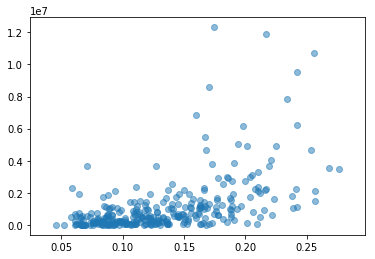

employment


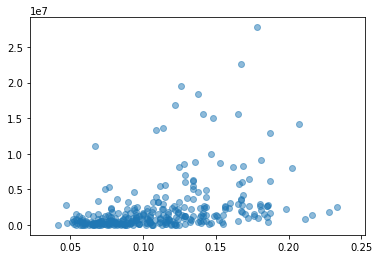

education


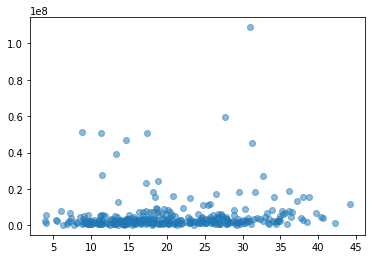

health


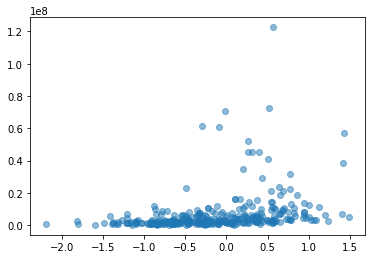

crime


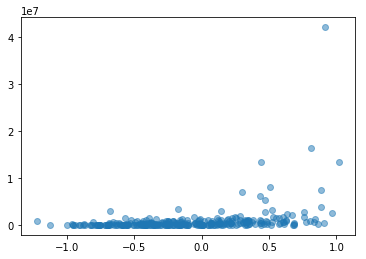

housing


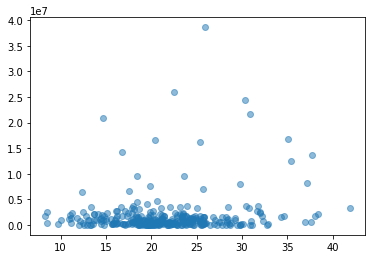

environment


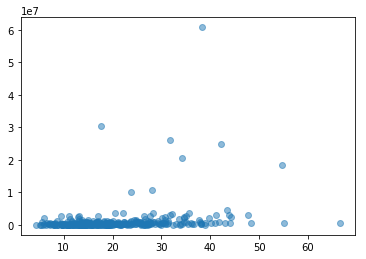

In [65]:
for i, t in enumerate(['income','employment','education','health','crime','housing','environment']):
    print(t)
    plt.scatter(df[df['theme']==t][t + '_score'], df[df['theme']==t]['Amount Awarded'], alpha=0.5)
    plt.show()

In [66]:
df.to_csv('../data/districts_data.csv')

---

## Export Group by Donor, Year, District

In [4]:
original_df.head()

,Identifier,Title,Description,Currency,Amount Applied For,Amount Awarded,Amount Disbursed,Award Date,URL,Planned Dates:Start Date,Planned Dates:End Date,Planned Dates:Duration (months),Actual Dates:Start Date,Actual Dates:End Date,Actual Dates:Duration (months),Recipient Org:Identifier,Recipient Org:Name,Recipient Org:Charity Number,Recipient Org:Company Number,Recipient Org:Postal Code,Recipient Org:Location:0:Geographic Code Type,Recipient Org:Location:0:Geographic Code,Recipient Org:Location:0:Name,Recipient Org:Location:1:Geographic Code Type,Recipient Org:Location:1:Geographic Code,Recipient Org:Location:1:Name,Recipient Org:Location:2:Geographic Code Type,Recipient Org:Location:2:Geographic Code,Recipient Org:Location:2:Name,Funding Org:Identifier,Funding Org:Name,Funding Org:Postal Code,Grant Programme:Code,Grant Programme:Title,Grant Programme:URL,Beneficiary Location:0:Name,Beneficiary Location:0:Country Code,Beneficiary Location:0:Geographic Code,Beneficiary Location:0:Geographic Code Type,Beneficiary Location:1:Name,Beneficiary Location:1:Country Code,Beneficiary Location:1:Geographic Code,Beneficiary Location:1:Geographic Code Type,Beneficiary Location:2:Name,Beneficiary Location:2:Country Code,Beneficiary Location:2:Geographic Code,Beneficiary Location:2:Geographic Code Type,Beneficiary Location:3:Name,Beneficiary Location:3:Country Code,Beneficiary Location:3:Geographic Code,Beneficiary Location:3:Geographic Code Type,Beneficiary Location:4:Name,Beneficiary Location:4:Country Code,Beneficiary Location:4:Geographic Code,Beneficiary Location:4:Geographic Code Type,Beneficiary Location:5:Name,Beneficiary Location:5:Country Code,Beneficiary Location:5:Geographic Code,Beneficiary Location:5:Geographic Code Type,Beneficiary Location:6:Name,Beneficiary Location:6:Country Code,Beneficiary Location:6:Geographic Code,Beneficiary Location:6:Geographic Code Type,Beneficiary Location:7:Name,Beneficiary Location:7:Country Code,Beneficiary Location:7:Geographic Code,Beneficiary Location:7:Geographic Code Type,From An Open Call?,The following fields are not in the 360 Giving Standard and are added by GrantNav.,Data Source,Publisher:Name,Recipient Region,Recipient District,Recipient District Geographic Code,Recipient Ward,Recipient Ward Geographic Code,Retrieved for use in GrantNav,License (see note),"Note, this file also contains OS data © Crown copyright and database right 2016, Royal Mail data © Royal Mail copyright and Database right 2016, National Statistics data © Crown copyright and database right 2015 & 2016, see http://grantnav.threesixtygiving.org/datasets/ for more information."
0,360G-SE-2010005783LOTT,JUNIOR CLUB DEVELOPMENT PROJECT,Funding under Sport England's Small Grants fun...,GBP,NaN,5800.0,5800.0,2010-09-29T00:00:00+00:00,NaN,2010-09-01T00:00:00+00:00,2011-08-31T00:00:00+00:00,12.0,NaN,NaN,NaN,360G-SE-2010005783,BARKERS' BUTTS RFC,NaN,NaN,CV5 9AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GB-COH-RC000766,Sport England,NaN,SG,Small Grants,http://www.sportengland.org/funding,CV5 9AR,GB,NaN,NaN,Coventry North West,NaN,E14000650,WPC,Coventry,NaN,E08000026,LAD,NaN,NaN,E01009523,LSOA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,https://www.sportengland.org/media/12725/360gi...,Sport England,West Midlands,Coventry District,E08000026,Bablake Ward,E05001218,2018-11-06T08:34:42+00:00,http://www.nationalarchives.gov.uk/doc/open-go...,NaN
1,360G-SE-2010007937LOTT,Urban X BBall League,Funding under Sport England's Small Grants fun...,GBP,NaN,9550.0,9550.0,2010-09-29T00:00:00+00:00,NaN,2010-09-01T00:00:00+00:00,2011-04-01T00:00:00+00:00,7.0,NaN,NaN,NaN,GB-COH-06113662,MBA Association,1119750,06113662,SG1 5RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GB-COH-RC000766,Sport England,NaN,SG,Small Grants,http://www.sportengland.org/funding,SG5 1JB,GB,NaN,NaN,Hitchin and Harpenden,NaN,E14000749,WPC,North Hertfordshire,NaN,E07000099,LAD,NaN,NaN,E01023616,LSOA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN